<a href="https://colab.research.google.com/github/s-r-aman/machine_learning_playground/blob/master/fastdotai_dl/lesson3_planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai kaggle
# !ls ../root/.fastai/data/planet -a

In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [26]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [27]:
! chmod 600 /root/.kaggle/kaggle.json
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  
! unzip -q -n {path}/train_v2.csv.zip -d {path}

train-jpg.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
train_v2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path.as_posix()}

In [29]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(
    flip_vert=True,
    max_lighting=0.1,
    max_zoom=1.05, max_warp=0.
)

In [0]:
np.random.seed(42)

In [0]:
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
        .random_split_by_pct(0.2)
        .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
       .databunch().normalize(imagenet_stats))

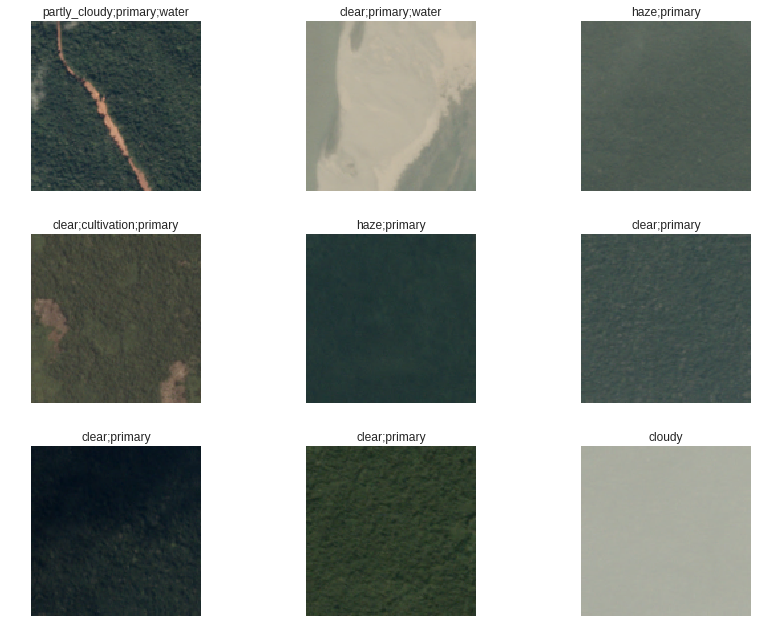

In [34]:
data.show_batch(rows=3, figsize=(12, 9))

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, models.resnet50, metrics=[acc_02, f_score])

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


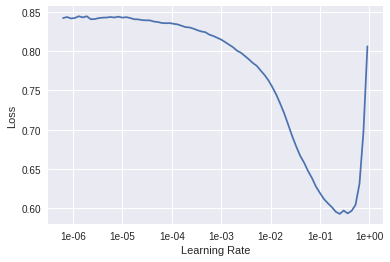

In [37]:
learn.recorder.plot()

In [0]:
lr = 0.01

In [39]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
1,0.125526,0.109923,0.948305,0.904122,03:48
2,0.108434,0.097760,0.949598,0.914380,03:44
3,0.100018,0.094645,0.955848,0.914134,03:45
4,0.095375,0.087454,0.956931,0.924965,03:45
5,0.087701,0.086585,0.957061,0.925652,03:46


In [0]:
learn.save('stage-1-rn50')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


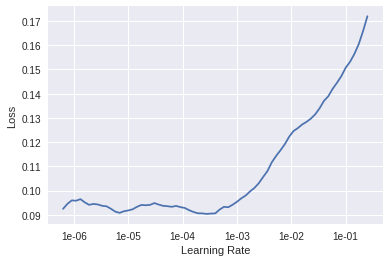

In [43]:
learn.lr_find()
learn.recorder.plot()